<a href="https://colab.research.google.com/github/mayad-a/Data/blob/main/Copy_of_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler





In [ ]:
# Step 1: تثبيت Kaggle package إذا لم يكن مثبتًا بالفعل
!pip install kaggle

# Step 2: إنشاء دليل لتخزين kaggle.json ونقله إليه
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Step 3: تغيير الصلاحيات للملف لضمان عدم حدوث مشاكل في الوصول إليه
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: تنزيل البيانات المطلوبة
!kaggle datasets download -d rohanrao/air-quality-data-in-india

# Step 5: استخراج الملفات إذا كانت مضغوطة

!unzip air-quality-data-in-india.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india
License(s): CC0-1.0
air-quality-data-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  air-quality-data-in-india.zip
replace city_day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: city_day.csv            
replace city_hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: city_hour.csv           
replace station_day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: station_day.csv         
replace station_hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: station_hour.csv        y
y

replace stations.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: stations.csv            


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('city_day.csv')


In [ ]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [ ]:
print(data.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775    

In [ ]:
def missing_values_table(df):

    total_missing = df.isnull().sum()
    percent_missing = (df.isnull().sum() / df.shape[0]) * 100


    missing_df = pd.DataFrame({
        'Total Missing': total_missing,
        'Percent Missing': percent_missing
    })


    missing_df = missing_df[missing_df['Total Missing'] > 0].sort_values('Total Missing', ascending=False)

    return missing_df


data_missing= missing_values_table(data)
data_missing

,Total Missing,Percent Missing
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [ ]:
df = data.dropna(subset=['AQI_Bucket'])
print(df.isnull().sum())

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64


In [ ]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns # mode only
print(numerical_columns)
print(categorical_columns)

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')
Index(['City', 'Date', 'AQI_Bucket'], dtype='object')


In [ ]:
class_col = 'AQI_Bucket'  # استبدل باسم العمود الذي يحتوي على الفئات
columns_with_missing_values = numerical_columns # استبدل بأسماء الأعمدة التي تحتوي على قيم مفقودة

# حساب الميديان لكل فئة ولكل عمود يحتوي على قيم مفقودة
medians_by_class = {col: df.groupby(class_col)[col].median() for col in columns_with_missing_values}

# دالة لاستبدال القيم المفقودة بالميديان المناسب بناءً على الفئة
def fill_missing_with_median(row, column):
    if pd.isna(row[column]):
        return medians_by_class[column][row[class_col]]
    else:
        return row[column]

# استبدال القيم المفقودة في كل عمود
for col in columns_with_missing_values:
    df[col] = df.apply(lambda row: fill_missing_with_median(row, col), axis=1)

<ipython-input-74-689f82f83940>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(df.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


<ipython-input-76-719210023f14>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



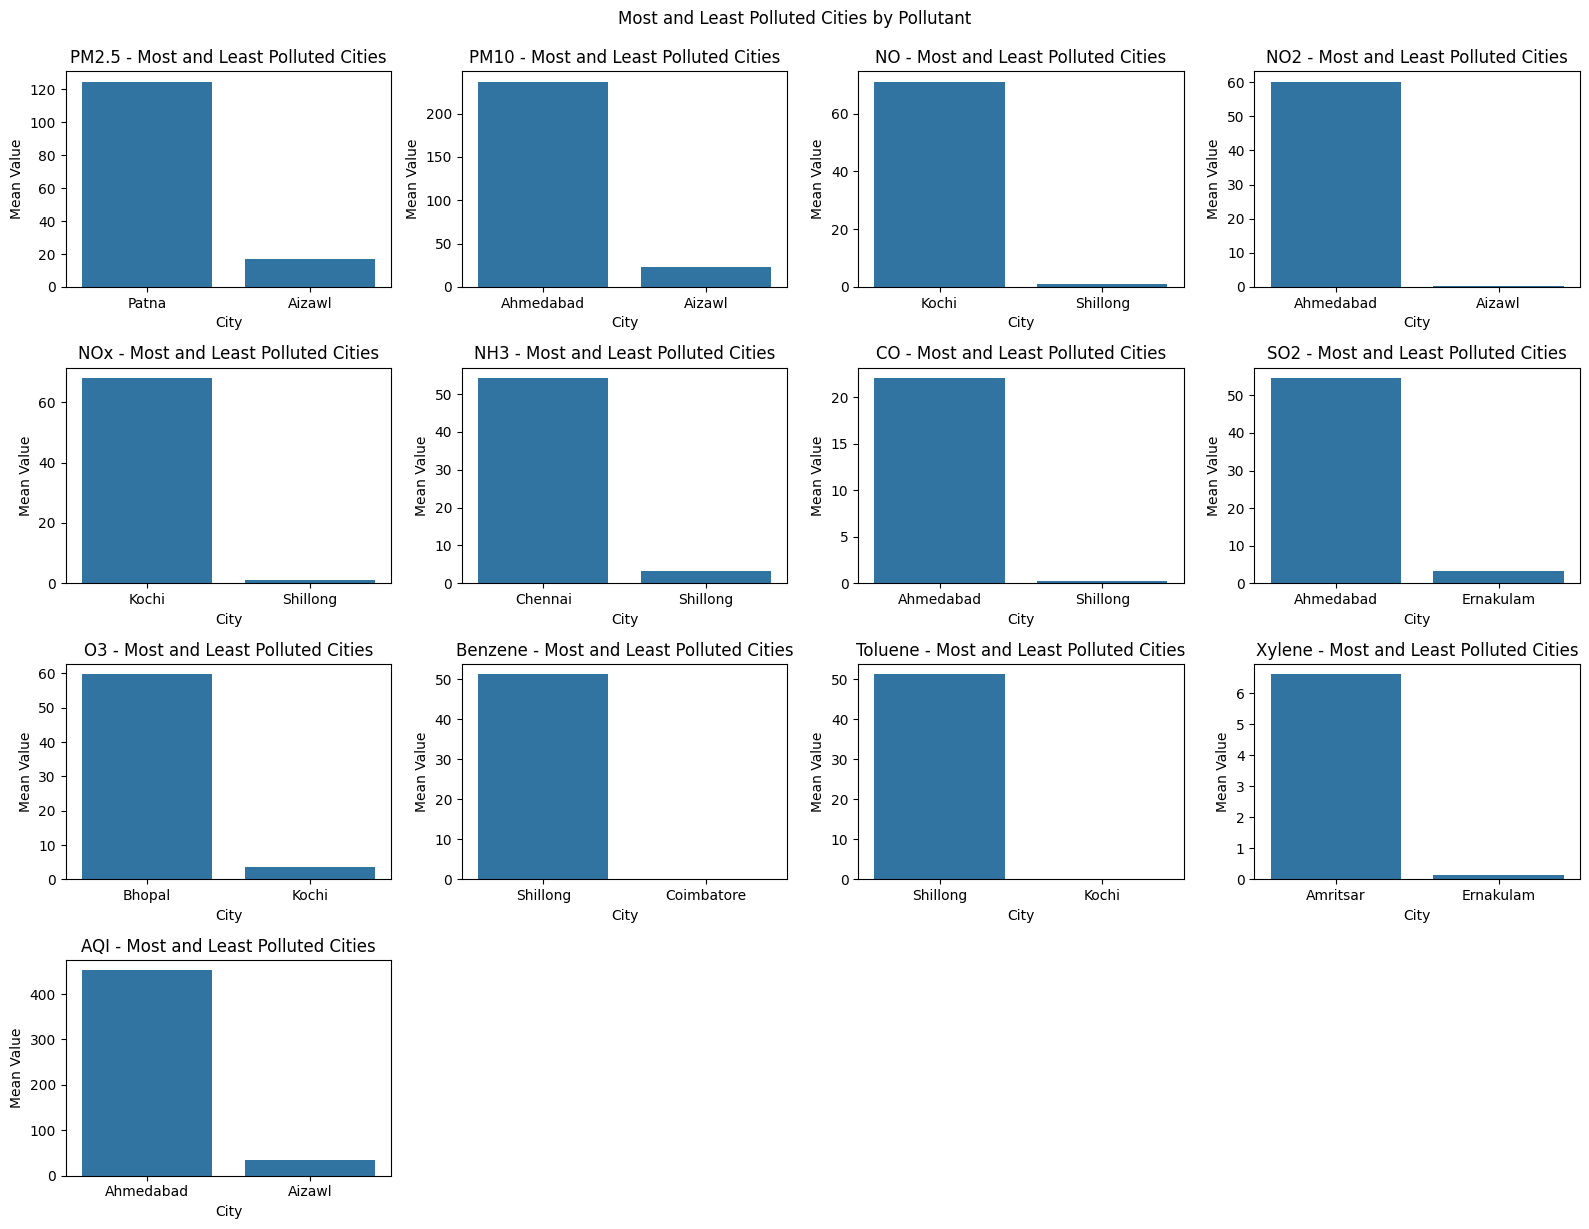

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Handle missing values by filling with the median of each column
df = df.fillna(df.median(numeric_only=True))

# Ensure numeric columns are of numeric dtype
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with NaN values after conversion to numeric
df = df.dropna(subset=numeric_cols)

# Calculate the mean of each pollutant for each city
city_means = df.groupby('City')[numeric_cols].mean()

# Plot the most and least polluted cities for each pollutant
plt.figure(figsize=(16, 12))
for i, pollutant in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    most_polluted = city_means[pollutant].idxmax()
    least_polluted = city_means[pollutant].idxmin()
    sns.barplot(x=[most_polluted, least_polluted], y=[city_means[pollutant].max(), city_means[pollutant].min()])
    plt.title(f'{pollutant} - Most and Least Polluted Cities')
    plt.xlabel('City')
    plt.ylabel('Mean Value')

plt.tight_layout()
plt.suptitle('Most and Least Polluted Cities by Pollutant', y=1.02)
plt.show()


In [ ]:
df2 = df.copy()
df2['Vehicular Pollution content'] = df2['PM2.5']+df2['PM10']+df2['NO']+df2['NO2']+df2['NOx']+df2['NH3']+df2['CO']
df2['Industrial Pollution content'] = df2['SO2']+df2['O3']+df2['Benzene']+df2['Toluene']+df2['Xylene']
df2 = df2.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          24850 non-null  object        
 1   Date                          24850 non-null  datetime64[ns]
 2   AQI                           24850 non-null  float64       
 3   AQI_Bucket                    24850 non-null  object        
 4   Vehicular Pollution content   24850 non-null  float64       
 5   Industrial Pollution content  24850 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.3+ MB


In [ ]:
import plotly.express as px
def max_bar_plot(var):
    df_grouped = df2[['City', var]].groupby('City').median().sort_values(by=var, ascending=False).head(22)
    df_grouped = df_grouped.reset_index()

    fig = px.bar(df_grouped, x='City', y=var, title=f'Most polluted cities ({var})', labels={'City': 'Cities', var: var})

    fig.show()

max_bar_plot('Industrial Pollution content')
max_bar_plot('Vehicular Pollution content')


In [ ]:
data1 = df['AQI'].dropna()
top_10_city = df.loc[data1.index].groupby('City')['AQI'].mean().reset_index()
top_10_city.sort_values('AQI', ascending=False, inplace=True)
top_10_city.head(10)

,City,AQI
0,Ahmedabad,452.122939
10,Delhi,259.487744
21,Patna,240.782042
12,Gurugram,225.123882
19,Lucknow,217.973059
23,Talcher,172.886819
16,Jorapokhar,159.251621
6,Brajrajnagar,150.280505
18,Kolkata,140.566313
13,Guwahati,140.111111


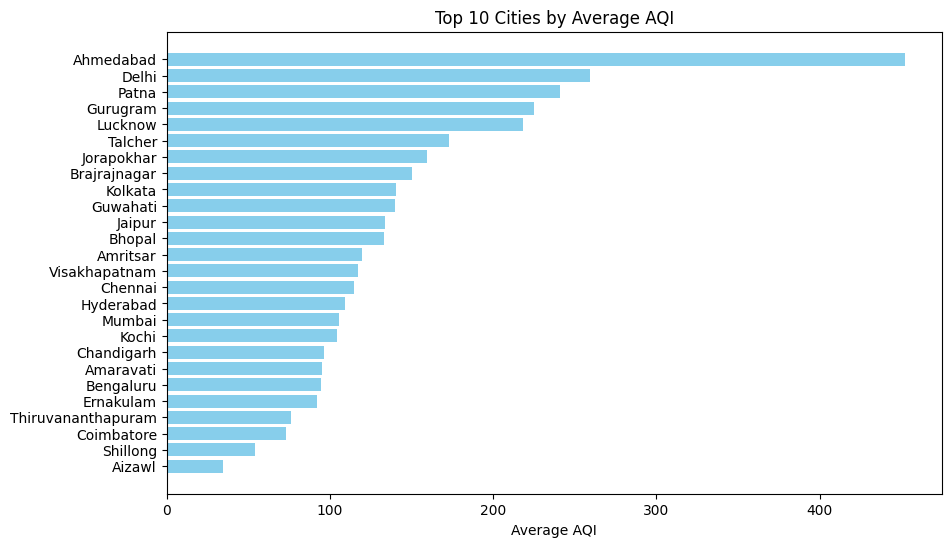

In [ ]:


# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(top_10_city['City'], top_10_city['AQI'], color='skyblue')
plt.xlabel('Average AQI')
plt.title('Top 10 Cities by Average AQI')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

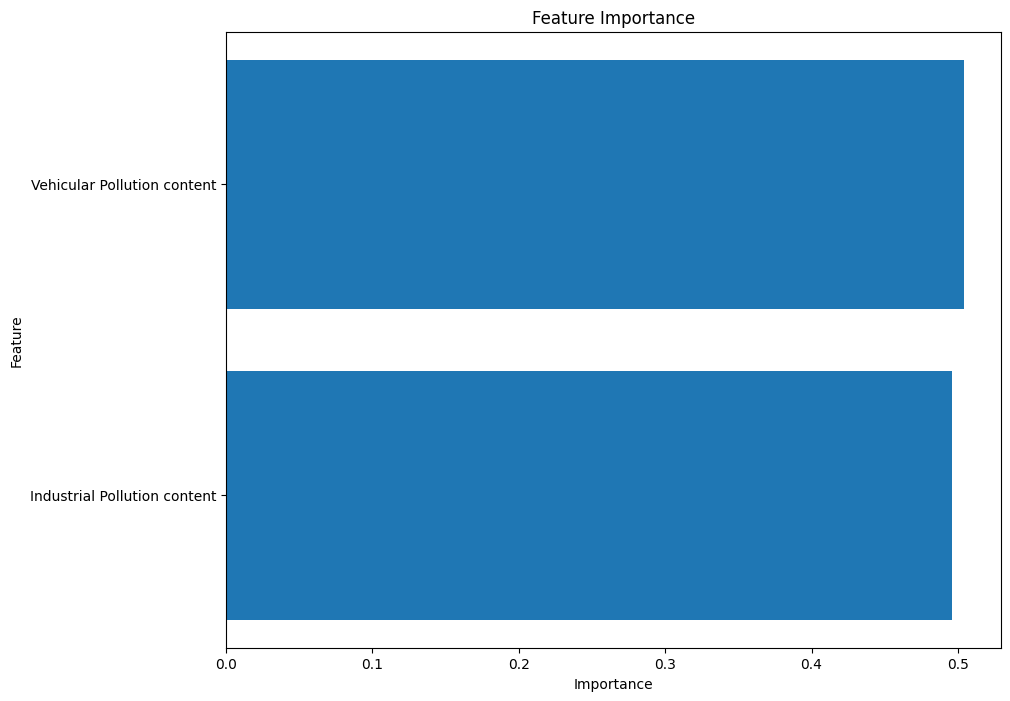

                        Feature  Importance
1   Vehicular Pollution content    0.504038
0  Industrial Pollution content    0.495962


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# افتراضاً أن df2 موجود بالفعل
X = df2[['Industrial Pollution content', 'Vehicular Pollution content']] # جميع الأعمدة عدا الأخيرة هي الميزات
y = df2["AQI"]   # العمود الأخير هو العلامات

# إنشاء وتدريب نموذج DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, y)

# الحصول على أهمية الميزات
feature_importances = tree_model.feature_importances_

# إنشاء DataFrame لأهمية الميزات
importances = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)

# رسم أهمية الميزات
plt.figure(figsize=(10, 8))
plt.barh(importances['Feature'], importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# طباعة أهمية الميزات
print(importances)


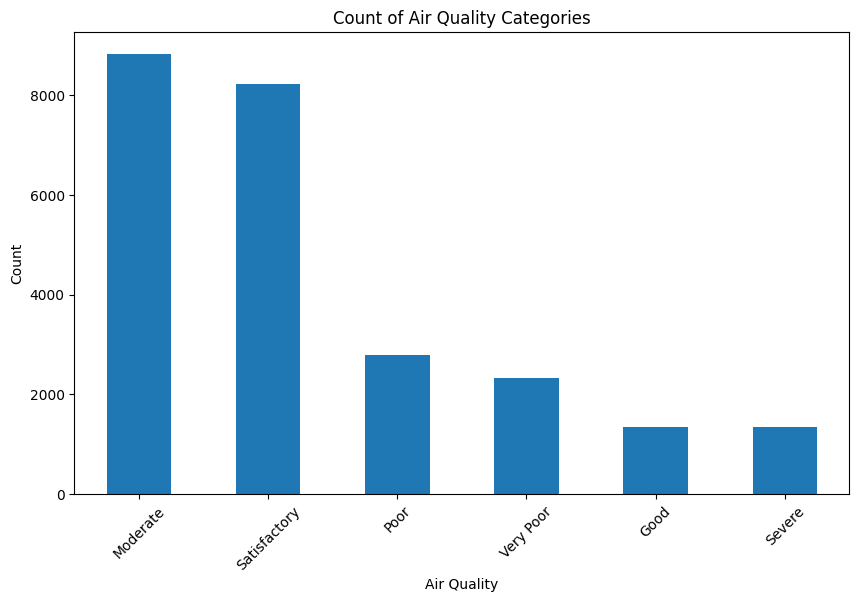

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
counts = df['AQI_Bucket'].value_counts()

# Plot using matplotlib
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.title('Count of Air Quality Categories')
plt.xticks(rotation=45)
plt.show()


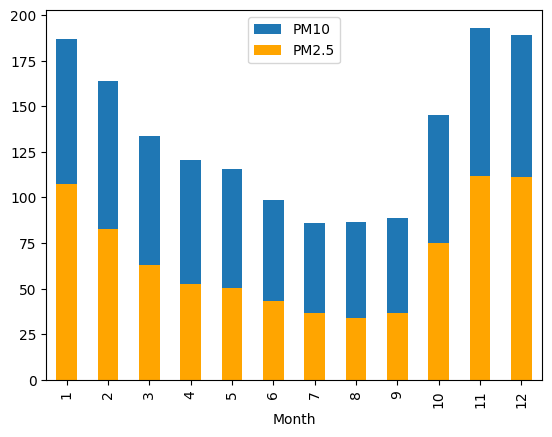

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df[['PM2.5', 'PM10', 'Month']].groupby(['Month'])['PM10'].mean().plot(kind='bar', label='PM10')
df[['PM2.5', 'PM10', 'Month']].groupby(['Month'])['PM2.5'].mean().plot(kind='bar', color='orange', label='PM2.5')
plt.legend()
plt.show()

In [ ]:
# استنتجنا ان الميكروبات بتقل في الصيف علشن مش بتتحمل الحرارة العالية

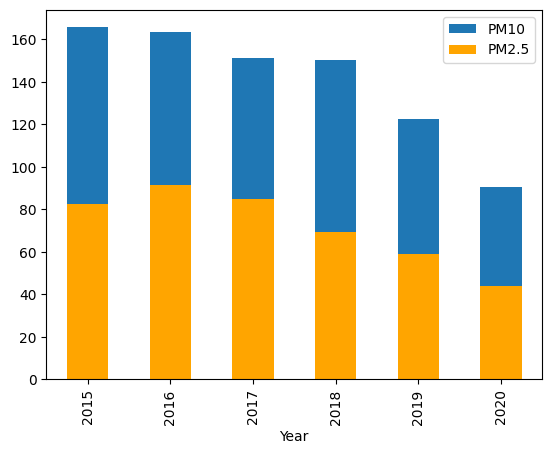

In [ ]:
df[['PM2.5', 'PM10', 'Year']].groupby([ 'Year'])['PM10'].mean().plot(kind='bar', label='PM10')
df[['PM2.5', 'PM10', 'Year']].groupby(['Year'])['PM2.5'].mean().plot(kind='bar', color='orange', label='PM2.5')
plt.legend()
plt.show()

In [ ]:
# اكتشفنا ان كل سنة تقريبا الميكروبات بتقل غالبا بسبب مشكلة الحرارة ان كل سنة الحرارة بتزيد عن السنة اللي قبلها فده اللي ادي لكده
#ودي الفاي في الفايدة الوحيدة للاحتباس الحراري

In [ ]:
major_cities = ['Ahmedabad', 'Delhi', 'Gurugram', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Mumbai']

recent_data = df.loc[(df.City.isin(major_cities)) & (df.Date.dt.year >= 2019)][['City', 'Date', 'AQI', 'AQI_Bucket']].reset_index(drop=True)
recent_data

,City,Date,AQI,AQI_Bucket
0,Ahmedabad,2019-01-01,1474.0,Severe
1,Ahmedabad,2019-01-02,1246.0,Severe
2,Ahmedabad,2019-01-03,1719.0,Severe
3,Ahmedabad,2019-01-04,1264.0,Severe
4,Ahmedabad,2019-01-05,1127.0,Severe
...,...,...,...,...
4358,Mumbai,2020-06-27,64.0,Satisfactory
4359,Mumbai,2020-06-28,64.0,Satisfactory
4360,Mumbai,2020-06-29,54.0,Satisfactory
4361,Mumbai,2020-06-30,54.0,Satisfactory


In [ ]:
df['AQI_Bucket'].value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

In [ ]:
aqi_cityd = recent_data[['City', 'Date', 'AQI']].pivot(index='Date', columns='City', values='AQI')
aqi_cityd

City,Ahmedabad,Bengaluru,Chennai,Delhi,Gurugram,Hyderabad,Kolkata,Mumbai
Date,,,,,,,,
2019-01-01,1474.0,128.0,212.0,475.0,450.0,132.0,370.0,181.0
2019-01-02,1246.0,103.0,158.0,501.0,433.0,133.0,351.0,175.0
2019-01-03,1719.0,101.0,167.0,537.0,462.0,141.0,363.0,239.0
2019-01-04,1264.0,106.0,192.0,432.0,384.0,142.0,431.0,221.0
2019-01-05,1127.0,104.0,116.0,440.0,392.0,148.0,391.0,180.0
...,...,...,...,...,...,...,...,...
2020-06-27,92.0,51.0,95.0,112.0,121.0,58.0,37.0,64.0
2020-06-28,82.0,61.0,98.0,196.0,153.0,49.0,43.0,64.0
2020-06-29,74.0,65.0,104.0,233.0,140.0,47.0,48.0,54.0


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=len(major_cities), cols=1, subplot_titles=major_cities)

rowx=1
colx=1
for city in major_cities:
    fig.add_trace(go.Bar(x=aqi_cityd.index, y=aqi_cityd[str(city)],
                  marker=dict(color=aqi_cityd[str(city)], coloraxis="coloraxis")), row=rowx, col=colx)
    rowx+=1

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")
fig.update_layout(plot_bgcolor='white')
fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-22', x1= '2020-03-22'
    )
])

fig.show()

In [ ]:
# هنا اكتشفا حاجة مهمة اووي
# التلوث في 2020 بسبب كرونا اللي ادت للعزل المنزلي


In [ ]:
df.to_csv('clean_city_day.csv', index=False)

In [ ]:
# عملت حفظ للداتا قبل اما اعمل
# decoder
# علشان بحتاج الملف مظبوط في ال
# deployment

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
numerical_cols = data.select_dtypes(include=['float64']).columns
corr_matrix = df.corr()


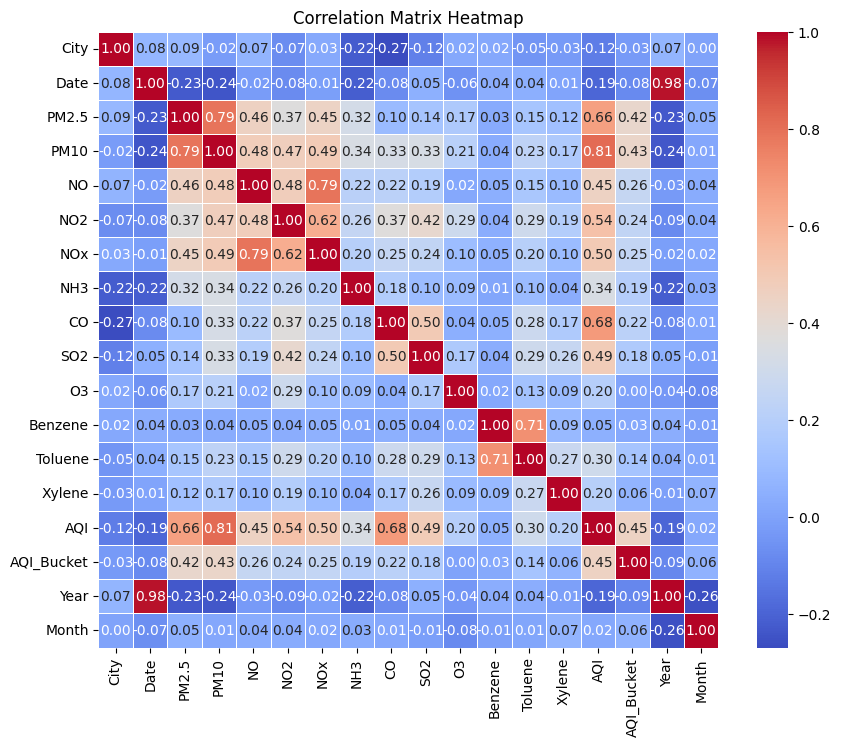

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the data
# data_normalized = scaler.fit_transform(df)

# # Convert the normalized data array back to a DataFrame
# data_normalized = pd.DataFrame(data_normalized,columns=df.columns)

# # Print the first few rows of the normalized data
# data_normalized.head()

In [ ]:
df[["AQI_Bucket"]].value_counts()

AQI_Bucket
1             8829
3             8224
2             2781
5             2337
0             1341
4             1338
Name: count, dtype: int64

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
m = df['AQI_Bucket']
class_weights = compute_class_weight(class_weight='balanced', classes=m.unique(), y=m)

# تحويل الأوزان إلى قاموس
class_weight_dict = dict(zip(m.unique(), class_weights))

print(class_weight_dict)

{2: 1.4892724439650007, 5: 1.7722150905719583, 4: 3.0954160438465372, 1: 0.46909804809906747, 3: 0.5036073281452659, 0: 3.088491175739498}


In [ ]:
X = df.drop([ 'AQI', 'AQI_Bucket', 'City' , 'Benzene' , 'NO2' , 'NOx' , 'Toluene',"Date","Month","Year" ], axis=1)
y = df['AQI_Bucket']

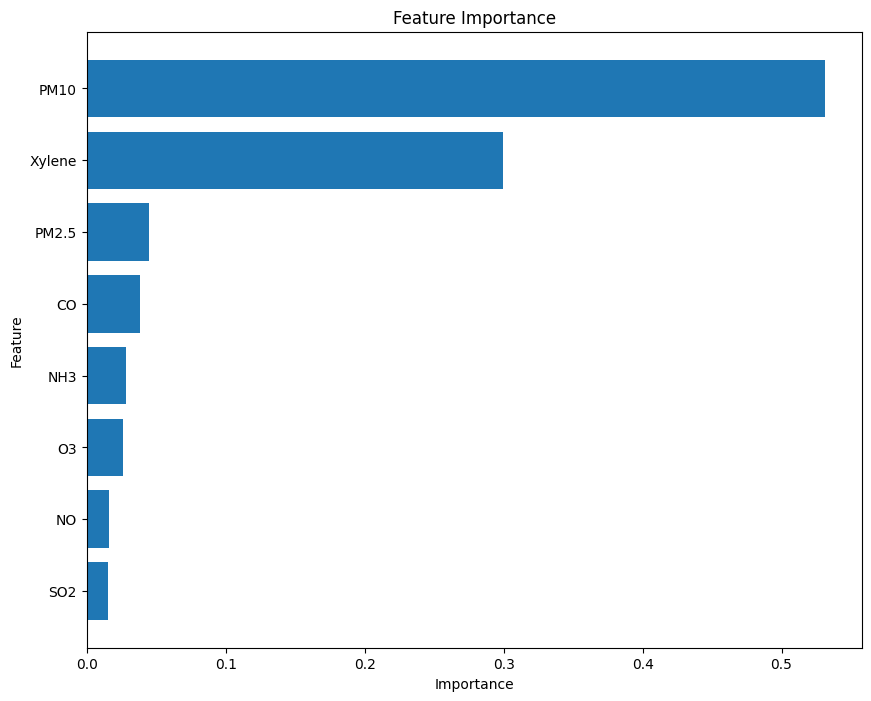

  Feature  Importance
1    PM10    0.531077
7  Xylene    0.299649
0   PM2.5    0.045009
4      CO    0.038145
3     NH3    0.028570
6      O3    0.025909
2      NO    0.016431
5     SO2    0.015210


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, y)


feature_importances = tree_model.feature_importances_


features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 8))
plt.barh(importances['Feature'], importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

print(importances)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:

model = RandomForestClassifier(n_estimators=30 , class_weight= class_weight_dict, random_state=42)
model.fit(X_train, y_train)

# إجراء التنبؤات
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9478873239436619
Confusion Matrix:
[[ 240    2    0   40    0    0]
 [   1 1680   17   47    0    0]
 [   0   33  508    2    0   12]
 [  12   55    1 1587    0    0]
 [   0    1    0    0  262    8]
 [   0    8   16    0    4  434]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       282
           1       0.94      0.96      0.95      1745
           2       0.94      0.92      0.93       555
           3       0.95      0.96      0.95      1655
           4       0.98      0.97      0.98       271
           5       0.96      0.94      0.95       462

    accuracy                           0.95      4970
   macro avg       0.95      0.93      0.94      4970
weighted avg       0.95      0.95      0.95      4970



# **Deployment**

In [ ]:
import pickle

In [ ]:
filename='Air_Quality_Prediciton.sav'
pickle.dump(model, open (filename, 'wb'))

In [ ]:
!pip install streamlit
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
!ngrok authtoken 2jefJlWq6TPua2Npeo2xYwbw1pi_6hdrjbHdzvBNkw3DWQTwB

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  # Example model
import joblib
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
# Function to load data
def load_data():
    # Replace with the path to your dataset
    data = pd.read_csv('/content/clean_city_day.csv')
    return data
def load_model():
    model = joblib.load('/content/Air_Quality_Prediciton.sav')
    return model

# Function to display data
def display_data(data):
    st.write("## Air Quality Data")
    st.write(data)

# Function to perform EDA
import streamlit as st
import pandas as pd
import plotly.express as px

def eda(data):
    df2 = data.copy()
    df2['Vehicular Pollution content'] = df2['PM2.5'] + df2['PM10'] + df2['NO'] + df2['NO2'] + df2['NOx'] + df2['NH3'] + df2['CO']
    df2['Industrial Pollution content'] = df2['SO2'] + df2['O3'] + df2['Benzene'] + df2['Toluene'] + df2['Xylene']

    df2['Date'] = pd.to_datetime(df2['Date'])
    df2['month'] = df2['Date'].dt.month
    mth_dic = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    df2['month'] = df2['month'].map(mth_dic)

    # Streamlit app
    st.title("Pollution Content Analysis")

    # Select city
    city = st.selectbox("Select a city", df2['City'].unique())

    # Plot data function for combined pollution content
    def plot_combined_data(var, city):
        city_df = df2[df2['City'] == city]  # Filter DataFrame for the specific city
        fig = px.line(city_df, x='Date', y=var, title=f'{var} in {city}', labels={'Date': 'Date', var: var})
        st.plotly_chart(fig)

    # Plot Vehicular Pollution content
    plot_combined_data('Vehicular Pollution content', city)

    # Plot Industrial Pollution content
    plot_combined_data('Industrial Pollution content', city)

    # Select pollutant
    pollutant = st.selectbox("Select a pollutant", ['All'] + ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'])

    # Plot data function for individual pollutants
    def plot_pollutant_data(pollutant, city):
        city_df = df2[df2['City'] == city]  # Filter DataFrame for the specific city
        if pollutant == 'All':
            pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
            monthly_avg = city_df.groupby('month')[pollutants].mean().reset_index()
            melted_df = monthly_avg.melt(id_vars='month', value_vars=pollutants, var_name='Pollutant', value_name='Average')
            fig = px.line(melted_df, x='month', y='Average', color='Pollutant', title=f'Monthly Average Pollution Levels in {city}')
            st.plotly_chart(fig)
        else:
            fig = px.line(city_df, x='Date', y=pollutant, title=f'{pollutant} in {city}', labels={'Date': 'Date', pollutant: pollutant})
            st.plotly_chart(fig)

    # Plot selected pollutant
    plot_pollutant_data(pollutant, city)

# Assuming you have a DataFrame 'data' ready to be passed into the function
# eda(data)



# Function for model training and prediction (placeholder)
def model_training(data,model):
    st.write("## Model Prediction")
    PM2_5 = st.text_input('PM2.5')
    PM10 = st.text_input('PM10')
    NO = st.text_input('NO')
    NH3 = st.text_input("NH3")
    CO = st.text_input('CO')
    SO2 = st.text_input('SO2')
    O3 = st.text_input('O3')
    Xylene = st.text_input('Xylene')
    if st.button("Predict"):
      df = pd.DataFrame({ "PM2.5": [PM2_5], "PM10": [PM10], "NO": [NO],"NH3": [NH3], "CO": [CO], "SO2": [SO2], "O3": [O3], "Xylene": [Xylene]})
      prediction = model.predict(df)
      if prediction == 2:
        st.write("Prediction: Poor")
        st.image("https://www.qmul.ac.uk/maths/media/maths/news/pexels-pixabay-459728.jpg")
      elif prediction == 5:
        st.write("Prediction: Very Poor")
        st.image("https://i0.wp.com/hyperallergic-newspack.s3.amazonaws.com/uploads/2023/06/GettyImages-1258511220.jpg?resize=1200%2C800&quality=95&ssl=1")
      elif prediction == 4:
        st.write("Prediction: Severe")
        st.image("https://cdn.shopify.com/s/files/1/0065/4780/0182/articles/AQL_AirPollutionClimateChange_Desk_2880x1000_crop_center.jpg?v=1698191714")
      elif prediction == 3:
        st.write("Prediction: Satisfactory")
        st.image("https://images.news9live.com/wp-content/uploads/2024/07/Noida-rain.jpg?w=802&enlarge=true")
      elif prediction == 0:
        st.write("Prediction: Good")
        st.image("https://smartcity.eletsonline.com/wp-content/uploads/2020/03/Over-90-cities-observe-good-air-quality-amid-lockdowns.jpg")
      elif prediction == 1:
        st.write("Prediction: Moderate")
        st.image("https://images.news9live.com/wp-content/uploads/2024/07/Noida-rain.jpg?w=802&enlarge=true")


def load_model():
    # Replace with the path to your model file
    model = joblib.load('/content/Air_Quality_Prediciton.sav')
    return model
# Main function to run the Streamlit app

st.title("Air Quality Prediction App")

# Load data
data = load_data()
model = load_model()
# Sidebar options
st.sidebar.title("Options")
option = st.sidebar.selectbox("Choose an option", ["Show Data", "EDA", "Model Predictiom"])

# Display data
if option == "Show Data":
    df=data.copy()
    df.set_index('Date', inplace=True)
    display_data(df)

elif option == "EDA":
    eda(data)
elif option == "Model Predictiom":
    model_training(data,model)



Overwriting app.py


In [ ]:
from pyngrok import ngrok

!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.184.56:8501

  Stopping...
  Stopping...


In [ ]:
from pyngrok import ngrok

# Terminate any existing tunnels
ngrok.kill()

# Run the Streamlit app
!streamlit run app.py &>/dev/null&

# Create a new tunnel
public_url = ngrok.connect(addr='8501')
print(f"Streamlit app running at: {public_url}")


Streamlit app running at: NgrokTunnel: "https://1b16-34-106-184-56.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
28,0,28,83.13,198.67,6.93,28.71,33.72,28.020,6.93,49.52,59.76,0.02,0.00,3.14,209.0,2,2015,1
29,0,29,79.84,285.43,13.85,28.68,41.08,37.575,13.85,48.49,97.07,0.04,0.00,4.81,328.0,5,2015,1
30,0,30,94.52,372.09,24.39,32.66,52.61,50.425,24.39,67.39,111.33,0.24,0.01,7.67,514.0,4,2015,1
31,0,31,135.99,372.09,43.48,42.08,84.57,50.425,43.48,75.23,102.70,0.40,0.04,25.87,782.0,4,2015,2
32,0,32,178.33,372.09,54.56,35.31,72.80,50.425,54.56,55.04,107.38,0.46,0.06,35.61,914.0,4,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,2004,15.02,50.94,7.68,25.06,19.54,12.470,0.47,8.55,23.30,2.24,12.07,0.73,41.0,0,2020,6
29527,25,2005,24.38,74.09,3.42,26.06,16.53,11.990,0.52,12.72,30.14,0.74,2.21,0.38,70.0,3,2020,6
29528,25,2006,22.91,65.73,3.45,29.53,18.33,10.710,0.48,8.42,30.96,0.01,0.01,0.00,68.0,3,2020,6
29529,25,2007,16.64,49.97,4.05,29.26,18.80,10.030,0.52,9.84,28.30,0.00,0.00,0.00,54.0,3,2020,6
